# Demographics in the United States
## An exploration of the relationships that exist between demographic datapoints

### Introduction

The United States is comprised of so many types of people and jobs, all making different amounts of money with different backgrounds and levels of education. As a country there are many systems in place that limit or guarantee certain future employment opportunities, depending on different qualities like race, gender, and education. 

In this report, we explore the relationships between the features in our dataset. We seek to understand the imbalances for gender opportunities by stratifying gender over many factors like job title, income, and more. We also attempt to predict one's likely income amount (over or under the 50k). 

### The Data

The dataset we used is from Kaggle.com, and includes multiple demographic datapoints about individuals in the United States. The dataset contains the following columns:


1. Age: continuous variable
2. Workclass: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. Fnlwgt: continuous variable, amount of people with same set of datapoints in the US
4. Education: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. Education-num: continuous.
6. Marital-status: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. Occupation: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. Relationship: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. Race: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. Sex: (categorical) Female, Male.
11. Capital-gain: continuous variable
12. Capital-loss: continuous variable
13. Hours-per-week: continuous variable
14. Native-country: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. Label: (categorical) Over_50k, Under_50k

### Package Imports

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

from gender_functions import plot_gender_eda
from gender_functions import process_df
from gender_functions import plot_tree


### Data Import

In [2]:
df = pd.read_csv('adult.data', header = None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status','occupation',
              'relationship', 'race', 'sex','capital-gain','capital-loss','hours-per-week','native country','label']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Exploritory Data Analysis

Understanding what our data looks like is important. We want to see what the data looks like, are there any empty or unreliable variables, is the dataset sparse. We also want to find any outliers and remove them.

First, we can see that there are no missing values in this data.

In [3]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native country    0
label             0
dtype: int64

Since age is correlated with income, older individulas tend to have higher income due to their experience in the fields. We can see that 43.7% of our data contains Americans over 40 years old.

In [4]:
len(df[df['age'] >= 40]) / len(df)

0.437240870980621

Next, we want to explore the income level of Americans. This dataset found that 24720 individuals make less than 50k a year and 7841 individuals earn more than 50k a year. Therefore, the percentage of Americans that makes more than 50k a year is around 24%.

In [5]:
df.label.value_counts()

 <=50K    24720
 >50K      7841
Name: label, dtype: int64

In [6]:
# Percent of americans making more than 50k a year
7841 / len(df)

0.2408095574460244

We want to see if more Americans over 40 years old make more than 50k a year. Assuming one makes more money as they age, we should see an increase. We found that 9216 individuals earn less than 50k and 5021 individuals who make more than 50k a year over 40 years old. The percentage of Americans over 40 years old and making over 50k a year is 35.3% which is higher than the Americans making over 50k a year without age boundary. 

In [7]:
df_over40 = df[df['age'] >= 40]
df_over40.label.value_counts()

 <=50K    9216
 >50K     5021
Name: label, dtype: int64

In [8]:
# Percentage of American over 40 and make more than 50k a year
5021 / len(df_over40)

0.35267261361241836

To explore the education level difference in gender, we created a count plot. We found that more males completed the same education level than females such that more males completed bachelor's than females. The data set contains more males than females. Without specifying the counts, we can see the overall trend that more males completed education than females. 

In [9]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'education', hue = 'sex', data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('Education Level Count by Gender')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1080x576 with 0 Axes>

We also want to explore if different races would be more likely to be in a particular occupation. There are more white people in the dataset overthrowing the proportion of the graph, making it unclear to see a trend directly from this plot.

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'occupation', hue = 'race', data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('Occupation Count by Race')
plt.show()

We want to exclude the possible outliers in our data to obtain a more accurate analysis of demographic data points. We exclude the distribution above 99 percent quantile or below the 1  percent quantile limit. This means anyone older than 74 or younger than 17 years old will not be included in the analysis. 

In [ ]:
def filter_outliers(df, column):
    q_low = df[column].quantile(0.01)
    q_hi  = df[column].quantile(0.99)
    filter_df = df[(df[column] < q_hi) & (df[column] > q_low)]
    return filter_df

In [ ]:
df = filter_outliers(df, 'age')
df.head()

### Gender Analysis

The following section explores the gender differences amongst non-instrinsic qualities like education level, income, occupation, working class, and marital status, to understand if there are any predictive features or noteworthy imbalances. Intrinsic features such as race, age, or nationality will not be considered, as these alone don't have any logical predictive power of gender, and included in the model would not be valid split points.

We first want to evaulate the ration of men to women in this dataset, to give context to any imbalances seen in the variables.

In [ ]:
df['sex'].value_counts()/len(df['sex'])

We can see that there is about 33/66 split on gender. This is important context to plotting relationships.

In [ ]:
plot_gender_eda(df)


From these plots, we can see there certain variables have more stratification on gender than others. Income, for example, shows that men are more likely to be making >50k. It also shows that men are more likely to be married in this dataset. It also shows that females are more educated.

In [ ]:
#Processing our dataframe for our model
X, target = process_df(df, 'sex')
#let's divide our data into a training and testing set, giving our test 15% of the data
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.15, random_state=42)

#using a Decision Tree
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)
clf = clf.fit(X_train,y_train)
clf.feature_names = list(X_train.columns.values)
y_pred = clf.predict(X_test)


Let's see how accurate is our model.

In [ ]:
metrics.accuracy_score(y_test, y_pred)

The below is a visualization of the decision tree.

In [ ]:
plot_tree(clf, target)

We can see from the decision tree that there is still a lot of impurity in each split, meaning that no single factor is helping to determine gender totally. 

### Income Prediction

The following section explores the predictive power of our features on the income variable. We are using a decision tree model, with an ensemble method for accuracy improvements. 

An important contextual cue for this analysis is the dataset’s income ratio of: over 50k and less than (or equal to) 50k

In [ ]:
df['label'].value_counts()/len(df['label'])

As we can see, there is a roughly, 24:76 split.

After doing some pre-processing. Including the creation of dummy-variables for all qualitative predictors in the dataset. Five different decision tree models were applied to the dataset to predict income. These models include a naïve, *“CART”*, decision tree, a bagged decision tree, a bagged decision tree with support-vector-machine model selection, a bagged decision tree with symmetric-uncertainty model selection, and a bagged decision tree with principal component analysis model selection. These model types vary in complexity, but, a best model could be selected out of them all by using 10-fold cross validation. 

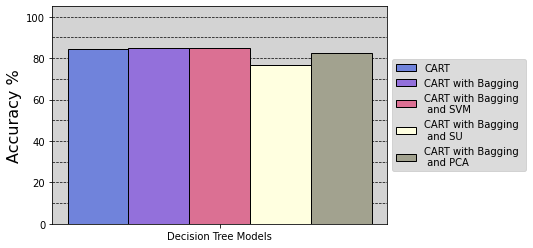

In [10]:
from IPython.display import Image
Image(filename='figures/accuracy_barchart.png')

As seen by this barchart- after creating the five, decision tree models. Although only slightly, the best performer- which obtains the highest, 10-fold, cross-validation accuracy. Is the decision tree, with bagging, and support vector machine model selection. More specifically, its accuracy tends closely towards 85%. 

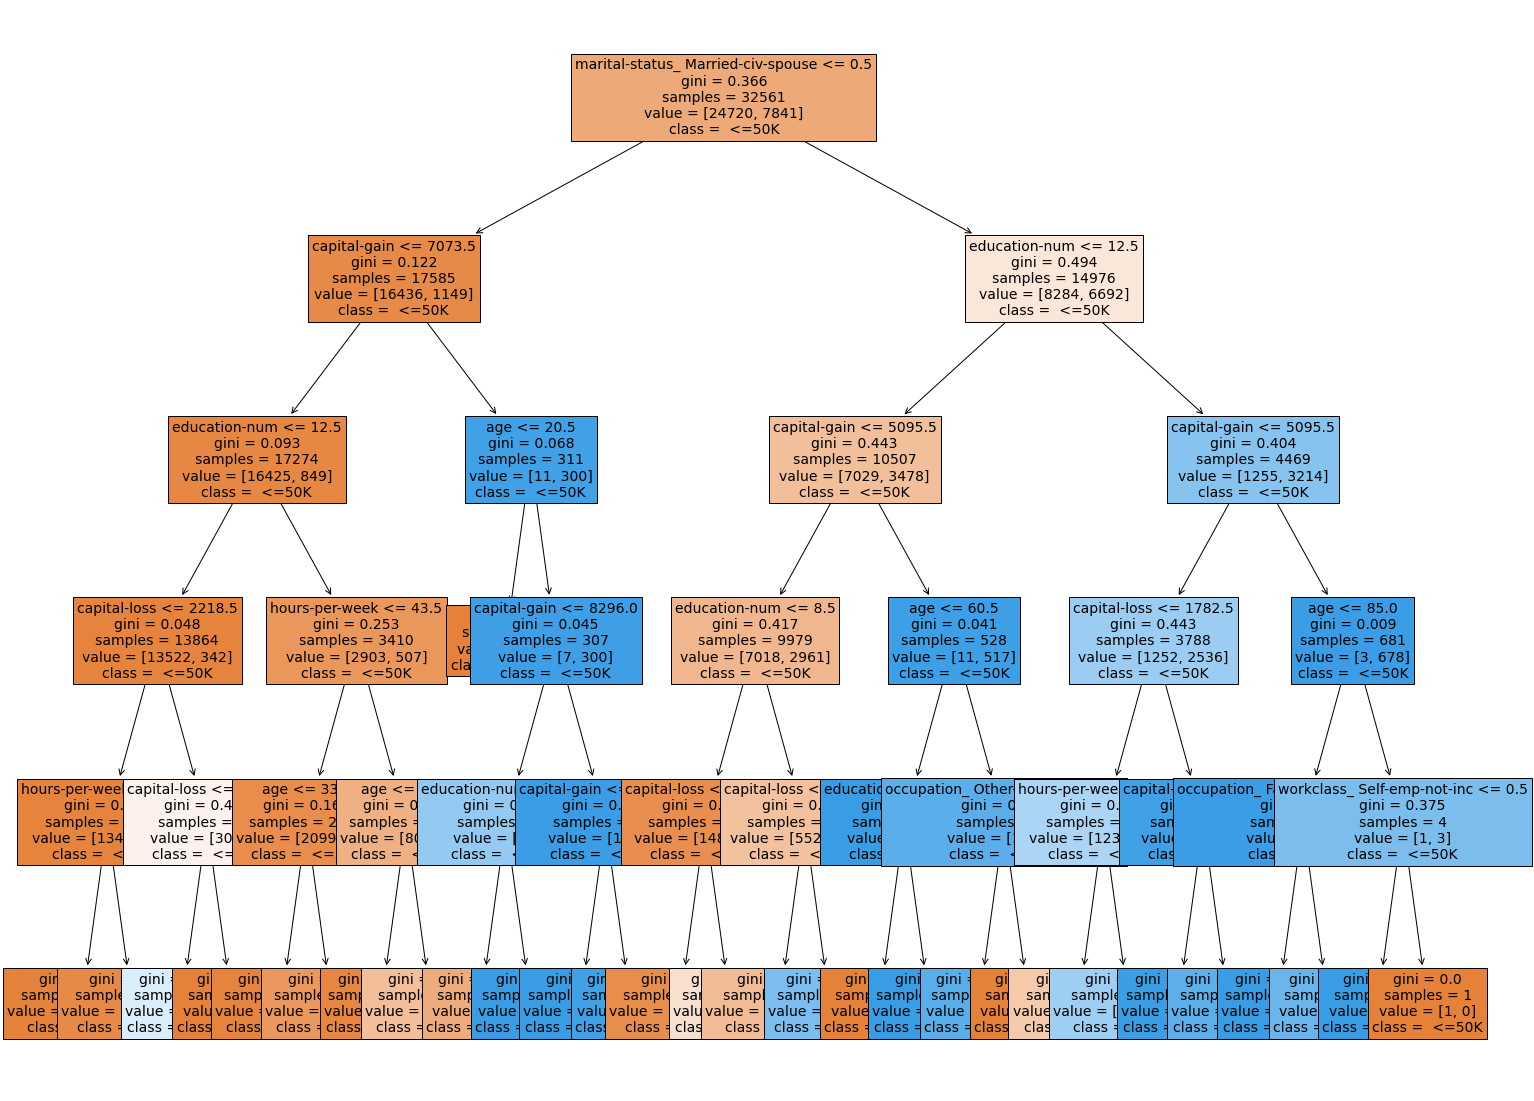

In [11]:
Image(filename='figures/income_tree.png')

As seen by the above figure, this is what the best, decision tree model for income prediction looks like. 

### Results and Limitations

blah blah

### Author Contributions

Midori - I created the EDA section before the gender analysis section. I helped with structuring the README file and with making the Jupyter Book. 

Samantha - I helped the team create template files for the EDA and Main ipynb files. I completed the gender exploration section, along with the gender_functions package folder and function tests. Helped write the narrative on the main ipynb file. Helped team with git workflow.

Noam